### Импорт библиотек и загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.svm import SVC
from scipy.stats import zscore

df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


### Анализ и чистка данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [3]:
df.columns = [f'feature_{i}' for i in range(1, 24)] + ['target']
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,target
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [4]:
df.isnull().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
target        0
dtype: int64

In [5]:
df.describe()

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [6]:
df.nunique().sort_values()

feature_1        2
feature_9        2
feature_8        2
target           2
feature_23       3
feature_18       6
feature_3       13
feature_2       14
feature_6       24
feature_7       24
feature_4       24
feature_11     127
feature_10     171
feature_19     183
feature_17     190
feature_14     223
feature_15     432
feature_13     474
feature_12     498
feature_20     568
feature_21     594
feature_5      737
feature_22     940
feature_16    1657
dtype: int64

In [7]:
df.duplicated().sum()

26

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   feature_1   991320 non-null  object 
 1   feature_2   991320 non-null  int64  
 2   feature_3   991320 non-null  int64  
 3   feature_4   991320 non-null  int64  
 4   feature_5   991320 non-null  float64
 5   feature_6   991320 non-null  float64
 6   feature_7   991320 non-null  float64
 7   feature_8   991320 non-null  float64
 8   feature_9   991320 non-null  float64
 9   feature_10  991320 non-null  float64
 10  feature_11  991320 non-null  float64
 11  feature_12  991320 non-null  float64
 12  feature_13  991320 non-null  float64
 13  feature_14  991320 non-null  float64
 14  feature_15  991320 non-null  float64
 15  feature_16  991320 non-null  float64
 16  feature_17  991320 non-null  float64
 17  feature_18  991320 non-null  float64
 18  feature_19  991320 non-null  float64
 19  feature

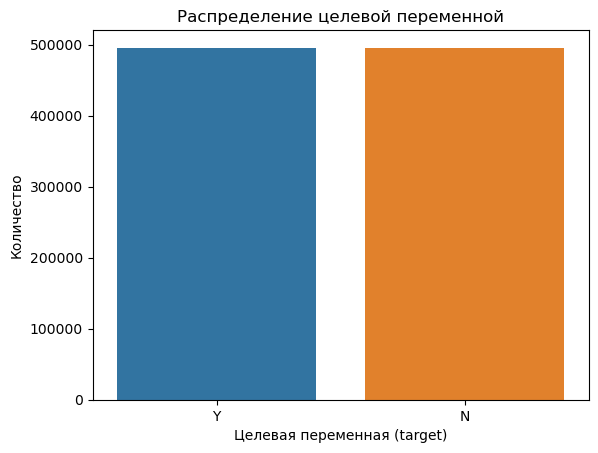

target
N    495844
Y    495476
Name: count, dtype: int64

In [11]:
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.xlabel('Целевая переменная (target)')
plt.ylabel('Количество')
plt.show()

target_frequency = df['target'].value_counts()
display(target_frequency)

### Выделение целевой переменной и масштабирование


In [12]:
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])

features = df.drop(columns=['target'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.insert(0, 'target', df['target'])

display(df.head())

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,target
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [13]:
display(scaled_df.head())

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23
0,1,0.939793,-0.889516,0.835883,0.936234,0.739792,0.031630,0.035669,-0.180332,-0.177295,...,-0.518430,0.361649,-0.392780,1.810933,-0.215254,0.290370,-0.212373,0.351396,0.056796,-0.742956
1,0,0.939793,-1.242092,1.913131,1.335783,0.655406,-0.133399,0.366369,-0.180332,-0.177295,...,-0.112363,0.975439,-0.109008,0.990704,-0.215254,0.082269,-0.254938,0.389406,-0.201019,1.700527
2,0,0.939793,-0.536940,0.297260,0.936234,0.824178,0.361689,0.862418,-0.180332,-0.177295,...,-0.924496,-1.089125,-0.275357,0.990704,-0.215254,0.082269,0.894308,0.237367,0.612089,-0.742956
3,0,0.939793,0.168212,1.374507,1.335783,0.824178,0.856776,0.366369,-0.180332,-0.177295,...,1.105835,-0.252140,-0.255787,2.126405,-0.215254,0.498472,0.128144,0.313386,-0.379506,-0.742956
4,0,0.939793,0.168212,0.297260,-0.262415,-0.104070,0.031630,0.366369,-0.180332,-0.177295,...,0.235693,0.110554,-0.275357,-0.271187,-0.215254,-0.125832,-0.297503,-0.522833,-0.240683,-0.742956


### Анализ выбросов

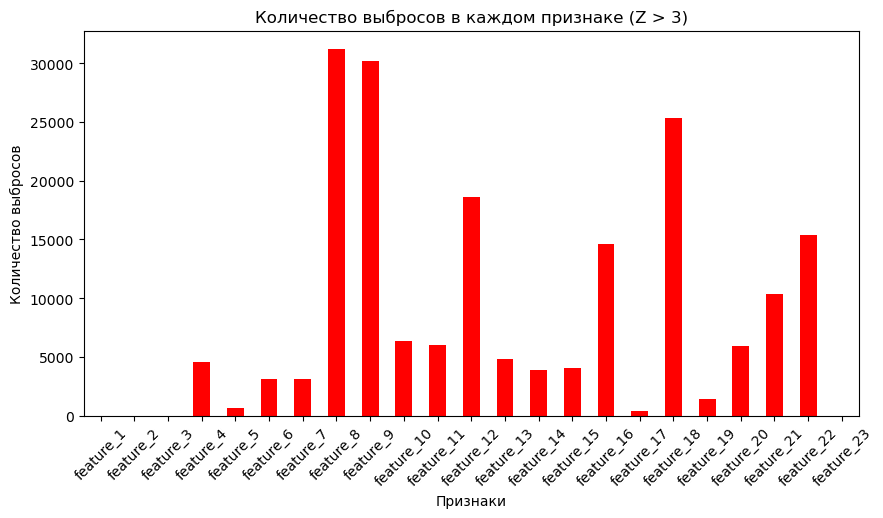

,Признак,Количество выбросов
feature_1,feature_1,0
feature_2,feature_2,0
feature_3,feature_3,0
feature_4,feature_4,4569
feature_5,feature_5,626
feature_6,feature_6,3118
feature_7,feature_7,3111
feature_8,feature_8,31219
feature_9,feature_9,30209
feature_10,feature_10,6378


In [14]:
clean_df = scaled_df.replace([np.inf, -np.inf], np.nan).dropna()
z_scores = clean_df.drop(columns=['target']).apply(zscore)
outliers = (z_scores > 3).sum()

plt.figure(figsize=(10, 5))
outliers.plot(kind='bar', color='red')
plt.title('Количество выбросов в каждом признаке (Z > 3)')
plt.xlabel('Признаки')
plt.ylabel('Количество выбросов')
plt.xticks(rotation=45)
plt.show()

outlier_info = pd.DataFrame({'Признак': z_scores.columns, 'Количество выбросов': outliers})
display(outlier_info)

### Нормализация данных и создание новых признаков

In [15]:
power_transformer = PowerTransformer(method='yeo-johnson')
power_features = power_transformer.fit_transform(scaled_features)
power_df = pd.DataFrame(power_features, columns=features.columns)
power_df['target'] = df['target'].reset_index(drop=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(power_features)
poly_names = poly.get_feature_names_out(features.columns)
poly_df = pd.DataFrame(poly_features, columns=poly_names)
poly_df['target'] = df['target'].reset_index(drop=True)

display(poly_df.head())
poly_df.info()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_20 feature_21,feature_20 feature_22,feature_20 feature_23,feature_21^2,feature_21 feature_22,feature_21 feature_23,feature_22^2,feature_22 feature_23,feature_23^2,target
0,0.939793,-0.887520,0.834903,0.966319,0.900362,0.255334,0.259322,-0.180332,-0.177295,-0.098661,...,-0.293736,-0.228168,0.228016,1.040462,0.808210,-0.807673,0.627802,-0.627385,0.626968,1
1,0.939793,-1.266753,1.924264,1.285664,0.818812,-0.005686,0.698021,-0.180332,-0.177295,0.575567,...,-0.491723,-0.056623,-0.679824,1.132754,0.130439,1.566071,0.015020,0.180336,2.165146,0
2,0.939793,-0.515199,0.293137,0.966319,0.980376,0.694473,1.222813,-0.180332,-0.177295,-0.098661,...,1.501794,2.492212,-1.362419,0.761806,1.264210,-0.691106,2.097944,-1.146884,0.626968,0
3,0.939793,0.202282,1.378772,1.285664,0.980376,1.218733,0.698021,-0.180332,-0.177295,1.476300,...,0.706985,-0.427493,-0.575049,0.947669,-0.573027,-0.770816,0.346492,0.466089,0.626968,0
4,0.939793,0.202282,0.293137,-0.164056,-0.008764,0.255334,0.698021,-0.180332,-0.177295,1.067964,...,0.746754,0.010358,0.513029,1.328360,0.018425,0.912600,0.000256,0.012658,0.626968,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991320 entries, 0 to 991319
Columns: 300 entries, feature_1 to target
dtypes: float64(299), object(1)
memory usage: 2.2+ GB


### Разделение данных на необходимые для экспериментов выборки и сохрание в виде csv файлов

In [16]:
import os

output_dir = 'data_subsets'
os.makedirs(output_dir, exist_ok=True)

sample_sizes = [10000, 50000, 100000, 500000, 991320]
feature_counts = [10, 50, 100, 200, 299]

def process_dataset(dataset, n_features):
    feature_cols = dataset.columns.drop('target')[:n_features] 
    selected_features = dataset[feature_cols].copy()
    selected_features['target'] = dataset['target'].values 
    return selected_features

for size in sample_sizes:
    if size > len(poly_df):
        print(f"Размер выборки {size} превышает размер датасета. Пропускаем.")
        continue
    
    subset = poly_df.sample(n=size, random_state=42)
    
    for count in feature_counts:
        if count > len(subset.columns) - 1:
            print(f"Количество признаков {count} превышает доступное для выборки {size}. Пропускаем.")
            continue
        
        processed_dataset = process_dataset(subset.copy(), count)
        
        filename = f'{output_dir}/subset_{size}_features_{count}.csv'
        processed_dataset.to_csv(filename, index=False)
        print(f'Saved: {filename}')

Saved: data_subsets/subset_10000_features_10.csv
Saved: data_subsets/subset_10000_features_50.csv
Saved: data_subsets/subset_10000_features_100.csv
Saved: data_subsets/subset_10000_features_200.csv
Saved: data_subsets/subset_10000_features_299.csv
Saved: data_subsets/subset_50000_features_10.csv
Saved: data_subsets/subset_50000_features_50.csv
Saved: data_subsets/subset_50000_features_100.csv
Saved: data_subsets/subset_50000_features_200.csv
Saved: data_subsets/subset_50000_features_299.csv
Saved: data_subsets/subset_100000_features_10.csv
Saved: data_subsets/subset_100000_features_50.csv
Saved: data_subsets/subset_100000_features_100.csv
Saved: data_subsets/subset_100000_features_200.csv
Saved: data_subsets/subset_100000_features_299.csv
Saved: data_subsets/subset_500000_features_10.csv
Saved: data_subsets/subset_500000_features_50.csv
Saved: data_subsets/subset_500000_features_100.csv
Saved: data_subsets/subset_500000_features_200.csv
Saved: data_subsets/subset_500000_features_299.cs